In [17]:
#import necessary packages: pandas, matplotlib, seaborn, and sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm

#change to seaborn's color style
sns.set(color_codes = True)

#remove output warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import data
#source: https://www.kaggle.com/datasets/vinesmsuic/star-categorization-giants-and-dwarfs
stars = pd.read_csv('https://raw.githubusercontent.com/lwpondscum/CISC9660_Lab_4/main/Star39552_balanced.csv')

In [3]:
#preview data
stars.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,10.00,31.66,6.19,1.213,K7V,22.502556,1
1,8.26,3.21,1.00,1.130,K0III,15.792525,0
2,8.27,12.75,1.06,0.596,F9V,18.797552,1
3,6.54,5.23,0.76,1.189,K1III,15.132508,0
4,8.52,0.96,0.72,0.173,B8V,13.431356,1


In [4]:
#preview data
stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39552 entries, 0 to 39551
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         39552 non-null  float64
 1   Plx          39552 non-null  float64
 2   e_Plx        39552 non-null  float64
 3   B-V          39552 non-null  float64
 4   SpType       39552 non-null  object 
 5   Amag         39552 non-null  float64
 6   TargetClass  39552 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 2.1+ MB


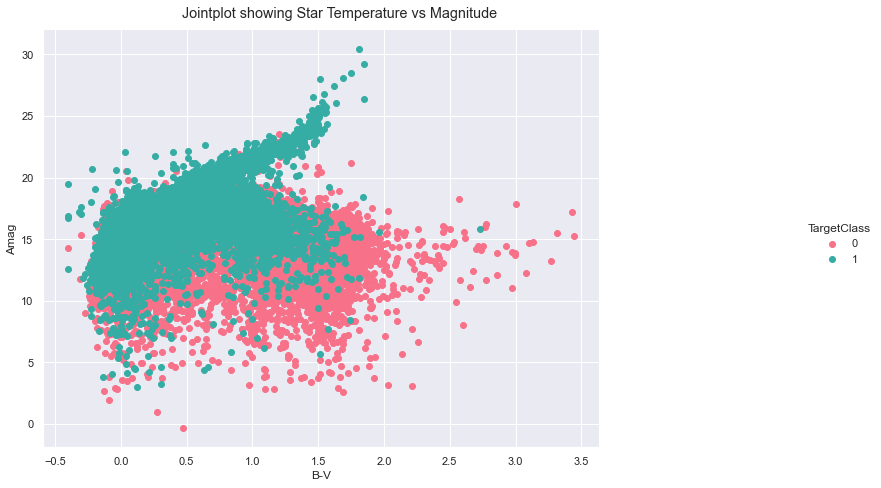

In [5]:
#creates a joint plot of color index (temperature) vs absolute magnitude colored by dwarf (0) or giant (1)
rp = sns.FacetGrid(stars, hue = 'TargetClass', palette = 'husl').map(plt.scatter, 'B-V', 'Amag').add_legend()
rp.fig.suptitle('Jointplot showing Star Temperature vs Magnitude')
plt.gcf().set_size_inches(15, 8)
plt.show()

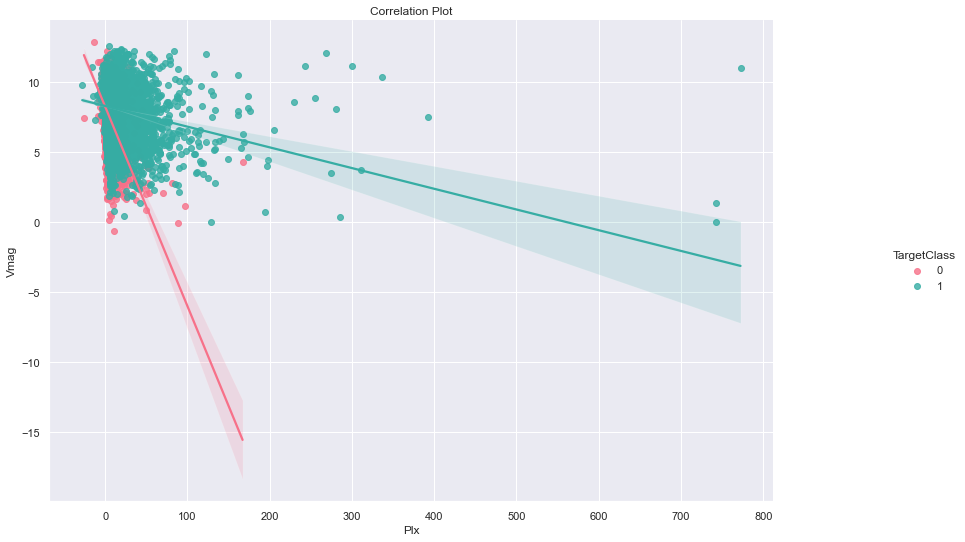

In [6]:
#creates a lineplot of distance from earth vs visual magnitude
sns.lmplot(x = 'Plx', y = 'Vmag', data = stars, hue = 'TargetClass', palette = 'husl').set(title = "Correlation Plot")
plt.gcf().set_size_inches(15, 8)
plt.show()

In [9]:
#drops the nonbinary text field
stars_mod = stars.drop('SpType', axis = 1)

In [12]:
stars_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39552 entries, 0 to 39551
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         39552 non-null  float64
 1   Plx          39552 non-null  float64
 2   e_Plx        39552 non-null  float64
 3   B-V          39552 non-null  float64
 4   Amag         39552 non-null  float64
 5   TargetClass  39552 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 1.8 MB


In [10]:
#creates a correlation matrix for the dataset
stars_mod.corr()

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
Vmag,1.000000,-0.160033,0.334320,0.032657,0.331050,0.176136
Plx,-0.160033,1.000000,0.073442,-0.029530,0.467262,0.251568
e_Plx,0.334320,0.073442,1.000000,0.007231,0.214767,0.123287
B-V,0.032657,-0.029530,0.007231,1.000000,-0.103257,-0.591911
Amag,0.331050,0.467262,0.214767,-0.103257,1.000000,0.476142
TargetClass,0.176136,0.251568,0.123287,-0.591911,0.476142,1.000000


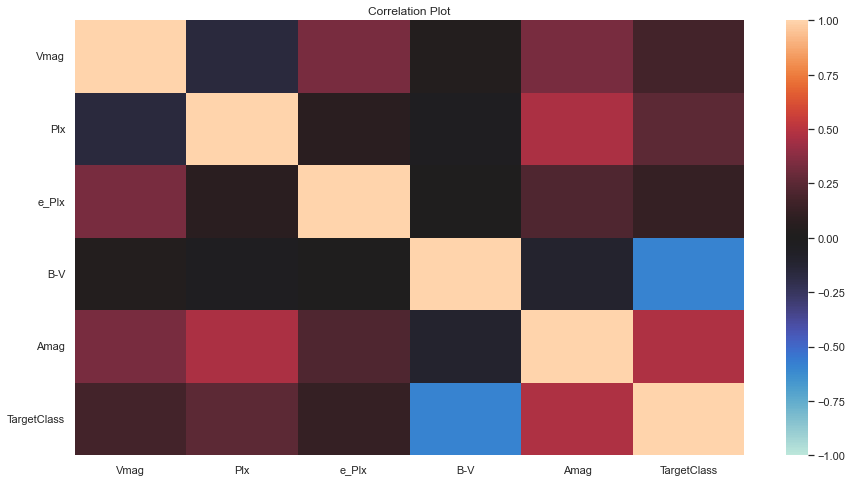

In [11]:
#creates heatmap for dataset
sns.heatmap(stars_mod.corr(), vmin = -1, vmax = 1, cmap = 'icefire')
plt.title('Correlation Plot')
plt.gcf().set_size_inches(15, 8)
plt.show()

In [13]:
#creates training and test sets of .70 to .30 ratio
X = stars_mod.drop(['TargetClass'], axis = 1)
y = stars_mod['TargetClass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 96)

In [14]:
#perform standardization on X sets
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
#creates and trains logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train.ravel())

LogisticRegression()

In [18]:
#creates and trains SVM model
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo')
linear.fit(X_train, y_train.ravel())

SVC(C=1, decision_function_shape='ovo', kernel='linear')

In [20]:
#cross-validate logistic regression model
folds = KFold(n_splits = 5)
result1 = cross_val_score(log_reg, X_train, y_train.ravel(), cv = folds, scoring = 'accuracy')
 
print(f' Avg accuracy:{result1.mean()}')

 Avg accuracy:0.8800114832076513


In [21]:
#cross-validate SVM model
result2 = cross_val_score(linear, X_train, y_train.ravel(), cv = folds, scoring = 'accuracy')

print(f' Avg accuracy:{result2.mean()}')

 Avg accuracy:0.8806615895574426


In [22]:
#have models predict test set
y_pred_log = log_reg.predict(X_test)
y_pred_svm = linear.predict(X_test)

In [23]:
#classification report for logisitc regression
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      5901
           1       0.85      0.90      0.88      5965

    accuracy                           0.87     11866
   macro avg       0.88      0.87      0.87     11866
weighted avg       0.88      0.87      0.87     11866



In [24]:
#classification report for SVM
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      5901
           1       0.85      0.91      0.88      5965

    accuracy                           0.88     11866
   macro avg       0.88      0.88      0.88     11866
weighted avg       0.88      0.88      0.88     11866

